In [117]:
import pandas
import numpy

In [118]:
# Read the data
df = pandas.read_csv('sales_data.csv')
df.head()

,sales,date
0,112,2022-08-21
1,118,2022-08-22
2,132,2022-08-23
3,129,2022-08-24
4,121,2022-08-25


In [119]:
# date to datetime object
df['date'] = pandas.to_datetime(df['date'])

# date to index
df.set_index('date', inplace=True)

In [120]:
# general info about the data
df.info()

# check if there are any missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2022-08-21 to 2023-01-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


sales    0
dtype: int64

<AxesSubplot:xlabel='date'>

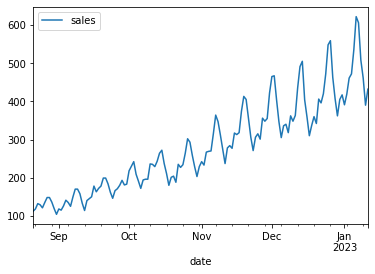

In [121]:
# plot the sales in a line chart
df.plot()

In [122]:
# create lagged features for sales for five days
def create_lagged_features(dataframe, lag=1):
    dataframe['t-'+str(lag)] = dataframe['sales'].shift(lag)
    return dataframe

for i in range(1,6):
    df = create_lagged_features(df, i)

# drop the first five rows
df.dropna(inplace=True)
df.head()

,sales,t-1,t-2,t-3,t-4,t-5
date,,,,,,
2022-08-26,135,121.0,129.0,132.0,118.0,112.0
2022-08-27,148,135.0,121.0,129.0,132.0,118.0
2022-08-28,148,148.0,135.0,121.0,129.0,132.0
2022-08-29,136,148.0,148.0,135.0,121.0,129.0
2022-08-30,119,136.0,148.0,148.0,135.0,121.0


In [65]:
# split the data into train and test with in-built function
from sklearn.model_selection import train_test_split

X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [25]:
# split the data into train, test and dev set
def split_data(dataframe):
    train = dataframe[:int(0.7*(len(dataframe)))]
    temp = dataframe[int(0.7*(len(dataframe))):]
    test = temp[:int(0.5*(len(temp)))]
    dev = temp[int(0.5*(len(temp))):]
    return train, test, dev

train, test, dev = split_data(df)

<AxesSubplot:xlabel='date'>

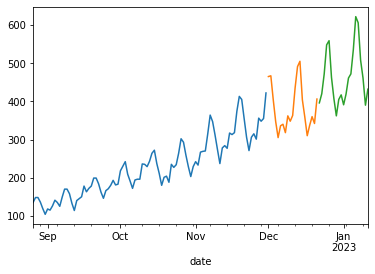

In [26]:
# plot the train, test and dev set
train['sales'].plot()
test['sales'].plot()
dev['sales'].plot()

# the gaps are normal because the sales can vary a lot from day to day

In [27]:
# split the data into x and y
def split_x_y(dataframe):
    x = dataframe.drop('sales', axis=1)
    y = dataframe['sales']
    return x, y

x_train, y_train = split_x_y(train)
x_test, y_test = split_x_y(test)
x_dev, y_dev = split_x_y(dev)

In [66]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# create the model
model = xgb.XGBRegressor()

# fit the model
model.fit(X_train, y_train)

# predict the sales
y_pred = model.predict(X_test)

# calculate the mean absolute error
mean_absolute_error(y_test, y_pred)

65.67018454415458

In [ ]:
#XGBoost: 65.67

<AxesSubplot:xlabel='date'>

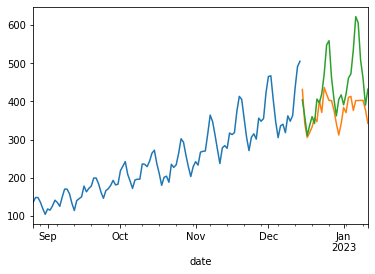

In [67]:
# plot the train set and y_pred and y_test
y_train.plot()
pandas.Series(y_pred, index=y_test.index).plot()
y_test.plot()


In [69]:
# linear regression
# import the model
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# predict the sales
y_pred = model.predict(X_test)

# calculate the mean absolute error
mean_absolute_error(y_test, y_pred)

41.035859620503935

<AxesSubplot:xlabel='date'>

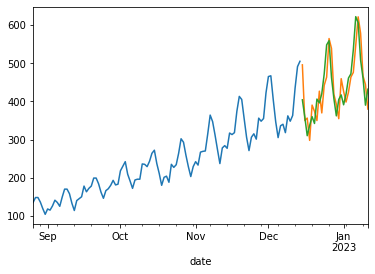

In [70]:
# plot the train set and y_pred and y_test
y_train.plot()
pandas.Series(y_pred, index=y_test.index).plot()
y_test.plot()

In [126]:
# Random Forest
# import the model
from sklearn.ensemble import RandomForestRegressor

# create the model
model = RandomForestRegressor()

# fit the model
model.fit(X_train, y_train)

# predict the sales
y_pred = model.predict(X_test)

# calculate the mean absolute error
mean_absolute_error(y_test, y_pred)

48.36321428571428

<AxesSubplot:xlabel='date'>

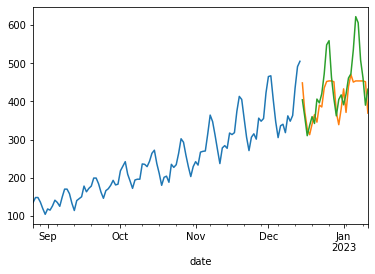

In [127]:
# plot the train set and y_pred and y_test
y_train.plot()
pandas.Series(y_pred, index=y_test.index).plot()
y_test.plot()

In [135]:
# ARIMA
# import the model
from statsmodels.tsa.arima.model import ARIMA

# create the model
model = ARIMA(y_train, order=(5,1,0))

# fit the model
model_fit = model.fit()

# predict the sales
y_pred = model_fit.forecast(steps=len(y_test))[0]

/home/olli/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/olli/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/olli/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

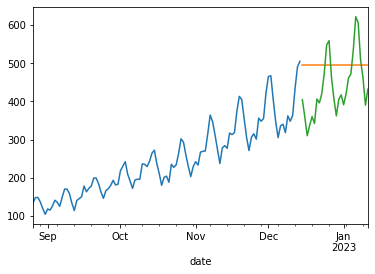

In [136]:
# plot the train set and y_pred and y_test
y_train.plot()
pandas.Series(y_pred, index=y_test.index).plot()
y_test.plot()